# Mathematical Underpinnings - Lab 10

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.preprocessing import scale

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lars
from sklearn.linear_model import LassoLars
from sklearn.linear_model import Lasso

## Task 1

In [4]:
df = pd.read_csv('prostate.data', sep="\t", index_col=0)

In [5]:
X = np.array(df.iloc[:, 0:8])
Y = np.array(df.iloc[:, 8])

In [6]:
X = scale(X)
Y = scale(Y)

### a)

In [7]:
mod_lars = Lars(fit_intercept=False)
# fit
mod_lars.fit(X, Y)

Lars(fit_intercept=False)

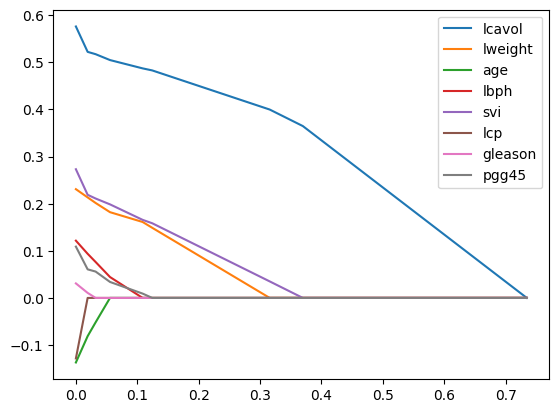

In [8]:
# plot
for i in range(len(df.columns)-2):
    plt.plot(mod_lars.alphas_, mod_lars.coef_path_[i], label=df.columns[i])
plt.legend()
plt.show()

Order in which the variables are included in the model:

In [9]:
order = np.argsort(mod_lars.coef_)[::-1]
for i in range(8):
    print(f"{i+1}) {df.columns[order].values[i]}")

1) lcavol
2) svi
3) lweight
4) lbph
5) pgg45
6) gleason
7) lcp
8) age


### b)

In [10]:
mod_lars.alphas_[0]

0.7344603262136732

### b1)

In [11]:
selected_variables = []

In [12]:
X_t = X.T
maximum = 0
for i in range(len(X_t)):
    corr = np.corrcoef(Y, X_t[i])[0,1]
    if corr>maximum:
        maximum = corr
        best = i
S_1 = X_t[best]

selected_variables.append(S_1)

### b2)

In [13]:
mod1 = LinearRegression(fit_intercept=False)
mod1.fit(S_1.reshape(-1, 1), Y)
Beta_1 = mod1.coef_[0]
Beta_1

0.734460326213673

### b3)

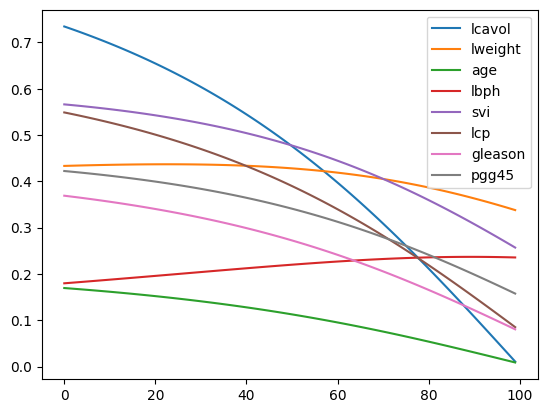

In [14]:
for i in range(len(df.columns)-2):
    corrs = []
    for alpha in range(0,100, 1):
        r_1_alpha = Y - alpha/100 * mod1.predict(S_1.reshape(-1,1))

        corrs.append(np.corrcoef(r_1_alpha, X_t[i])[0,1])
    plt.plot(corrs, label=df.columns[i])

plt.legend()
plt.show()

The first line that crosses "lcavol" is line corresponding to variable "svi" for alpha level a little bit below 1/2. Lets say .49

### b4)

In [15]:
alpha_guess = 0.49
S_2_guess = X_t[4]

r_1_alpha2 = Y - 49/100 * mod1.predict(S_1.reshape(-1,1))
np.abs(np.corrcoef(r_1_alpha2, S_2_guess)[0,1]-np.corrcoef(r_1_alpha2, S_1)[0,1]) < 0.01

True

### b5)

$$ \textrm{Cor}(Y - \tilde\alpha\hat Y, X_i) = ... \cdot\textrm{Cor}(Y, X_i) - ... \cdot \tilde\alpha \cdot \textrm{Cor}(\tilde\alpha\hat Y, X_i) $$

In our case, $i=0$, $j=4$:
$$ |\textrm{Cor}(Y - \tilde\alpha\hat Y, X_i)| = |\textrm{Cor}(Y - \tilde\alpha\hat Y, X_j)|$$

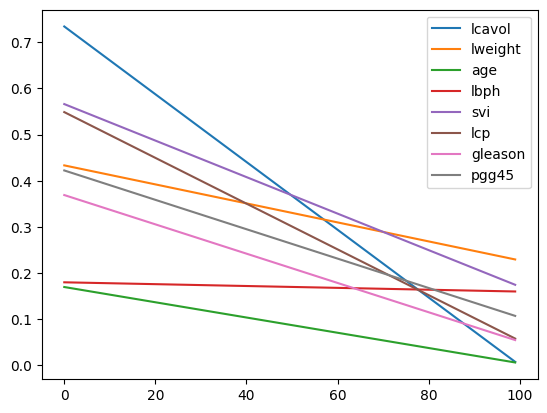

In [16]:
Y_pred = mod1.predict(S_1.reshape(-1, 1))
for i in range(len(X_t)):
    res = []
    for alpha in range(0,100, 1):
        alpha /= 100
        res.append(np.sqrt(np.var(Y)) * np.corrcoef(Y, X_t[i])[0,1] - np.sqrt(np.var(Y_pred)) * alpha * np.corrcoef(Y_pred, X_t[i])[0,1])
    plt.plot(res, label=df.columns[i])

plt.legend()
plt.show()

In [17]:
alpha_2_tilde = (np.sqrt(np.var(Y)) * np.corrcoef(Y, S_1)[0,1] - np.sqrt(np.var(Y)) * np.corrcoef(Y, S_2_guess)[0,1]) / (np.sqrt(np.var(Y_pred)) * np.corrcoef(Y_pred, S_1)[0,1] - np.sqrt(np.var(Y_pred)) * np.corrcoef(Y_pred, S_2_guess)[0,1])
alpha_2_tilde

0.4967289013871955

### b6)

In [18]:
alpha_2 = np.sqrt(np.var(Y)) * np.corrcoef(Y, S_2_guess)[0,1] - np.sqrt(np.var(Y_pred)) * alpha_2_tilde * np.corrcoef(Y_pred, S_2_guess)[0,1]
r_1_alpha2 = Y - alpha_2_tilde * Y_pred

selected_variables.append(S_2_guess)

np.abs(alpha_2 - mod_lars.alphas_[1]) < 0.01



True

### b7)

In [19]:
mod2 = LinearRegression(fit_intercept=False)
mod2.fit(np.transpose(selected_variables), r_1_alpha2)
Beta_2 = mod2.coef_[-1]
Beta_2

0.24020135537841222

### b8)

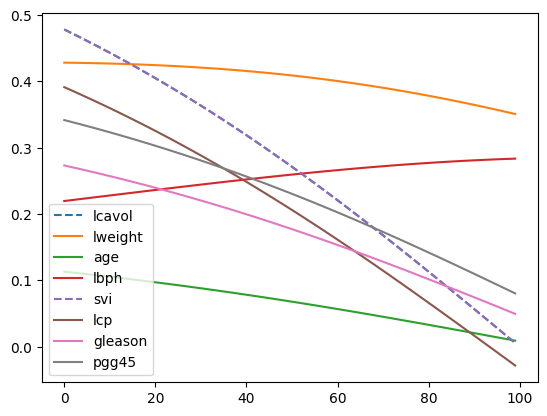

In [20]:
Y_pred2 = mod2.predict(np.transpose(selected_variables))

already_choosen = [0, 4]

i=0
for X_i in X_t:
    res = []
    for alpha in range(100):
        alpha /= 100
        r_2_alpha2 = r_1_alpha2 - alpha * Y_pred2
        res.append(np.corrcoef(r_2_alpha2, X_i)[0,1])
    plt.plot(res, label=df.columns[i]) if i not in already_choosen else plt.plot(res, '--', label=df.columns[i])
    i+=1
plt.legend()
plt.show()

"lcavol" and "svi" cover each other

### b9)

next variable will be lweight

In [22]:
alpha_guess = 0.49
S_3_guess = X_t[1]

r_3_alpha1 = Y - 15/100 * mod2.predict(np.transpose(selected_variables))


### b10)

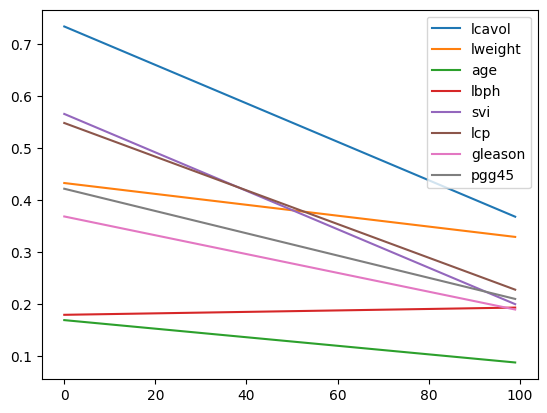

In [24]:
Y_pred2 = mod2.predict(np.transpose(selected_variables))
for i in range(len(X_t)):
    res = []
    for alpha in range(0,100, 1):
        alpha /= 100
        res.append(np.sqrt(np.var(Y)) * np.corrcoef(Y, X_t[i])[0,1] - np.sqrt(np.var(Y_pred2)) * alpha * np.corrcoef(Y_pred2, X_t[i])[0,1])
    plt.plot(res, label=df.columns[i])

plt.legend()
plt.show()

In [28]:
alpha_3_tilde = (np.sqrt(np.var(r_1_alpha2)) * np.corrcoef(r_1_alpha2, S_2_guess)[0,1] - np.sqrt(np.var(r_1_alpha2)) * np.corrcoef(r_1_alpha2, S_3_guess)[0,1]) / (np.sqrt(np.var(Y_pred2)) * np.corrcoef(Y_pred2, S_2_guess)[0,1] - np.sqrt(np.var(Y_pred2)) * np.corrcoef(Y_pred2, S_3_guess)[0,1])
alpha_3_tilde

0.14590879649354732

### b11)

In [29]:
alpha_3 = np.sqrt(np.var(r_1_alpha2)) * np.corrcoef(r_1_alpha2, S_3_guess)[0,1] - np.sqrt(np.var(Y_pred2)) * alpha_3_tilde * np.corrcoef(Y_pred2, S_3_guess)[0,1]
r_1_alpha3 = Y - alpha_3_tilde * Y_pred

selected_variables.append(S_3_guess)

np.abs(alpha_3 - mod_lars.alphas_[2]) < 0.01

True

### c)

## Task 2

In [ ]:
X = pd.read_table("data/SRBCT_X.txt", sep=" ")
Y = pd.read_table("data/SRBCT_Y.txt", sep=" ")

X = np.array(X)
Y = np.array(Y)[:,0]

In [ ]:
X = scale(X)
Y = Y - np.mean(Y)

### a)

In [ ]:
mod_lars = Lars(n_nonzero_coefs=80)
# fit

In [ ]:
# plot

In [ ]:
# the order

### b)

In [ ]:
mod_lassolars = LassoLars(alpha=0.15)
# fit

In [ ]:
# order

In [ ]:
# plot

### c)

In [ ]:
lasso_coef = np.zeros((X.shape[1], mod_lassolars.alphas_.shape[0]))

In [ ]:
for i in range(mod_lassolars.alphas_.shape[0]):
    mod_lasso = Lasso(alpha=mod_lassolars.alphas_[i])
    mod_lasso.fit(X, Y)

    lasso_coef[:,i] = mod_lasso.coef_

In [ ]:
# plot